In [38]:
import bilby
from gwpy.timeseries import TimeSeries
import numpy as np

In [39]:
duration = 4.0
sampling_frequency = 2048.0
minimum_frequency = 20

# Specify the output directory and the name of the simulation.
outdir = "outdir"
label = "fast_tutorial"
bilby.core.utils.setup_logger(outdir=outdir, label=label)

# Set up a random seed for result reproducibility.  This is optional!
np.random.seed(88170235)


In [40]:
injection_parameters = dict(
    mass_1=36.0,
    mass_2=29.0,
    a_1=0.4,
    a_2=0.3,
    tilt_1=0.5,
    tilt_2=1.0,
    phi_12=1.7,
    phi_jl=0.3,
    luminosity_distance=2000.0,
    theta_jn=0.4,
    psi=2.659,
    phase=1.3,
    geocent_time=1126259642.413,
    ra=1.375,
    dec=-1.2108,
)


In [41]:
waveform_arguments = dict(
    waveform_approximant="IMRPhenomPv2",
    reference_frequency=50.0,
    minimum_frequency=minimum_frequency,
)

In [42]:
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    time_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)

19:15 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: None
  time_domain_source_model: bilby.gw.source.lal_binary_black_hole
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [43]:
ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency,
    duration=duration,
    start_time=injection_parameters["geocent_time"] - 2,
)
ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)

XLAL Error - XLALSimIMRPhenomP (/home/conda/feedstock_root/build_artifacts/lalsimulation-split_1647252043927/work/lib/LALSimIMRPhenomP.c:506): f_max <= f_min
XLAL Error - XLALSimIMRPhenomP (/home/conda/feedstock_root/build_artifacts/lalsimulation-split_1647252043927/work/lib/LALSimIMRPhenomP.c:506): Input domain error
XLAL Error - XLALSimInspiralChooseFDWaveform (/home/conda/feedstock_root/build_artifacts/lalsimulation-split_1647252043927/work/lib/LALSimInspiral.c:1961): Internal function call failed: Input domain error


RuntimeError: Internal function call failed: Input domain error

In [14]:
priors = bilby.gw.prior.BBHPriorDict()
for key in [
    "a_1",
    "a_2",
    "tilt_1",
    "tilt_2",
    "phi_12",
    "phi_jl",
    "psi",
    "ra",
    "dec",
    "geocent_time",
    "phase",
]:
    priors[key] = injection_parameters[key]


19:00 bilby INFO    : No prior given, using default BBH priors in /cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/bilby/gw/prior_files/precessing_spins_bbh.prior.


In [15]:
likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator
)

In [16]:
likelihood

GravitationalWaveTransient(interferometers=[Interferometer(name='H1', power_spectral_density=PowerSpectralDensity(psd_file='None', asd_file='/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), minimum_frequency=20.0, maximum_frequency=1024.0, length=4.0, latitude=46.45514666666667, longitude=-119.4076571388889, elevation=142.554, xarm_azimuth=125.9994, yarm_azimuth=215.9994, xarm_tilt=-0.0006195, yarm_tilt=1.25e-05), Interferometer(name='L1', power_spectral_density=PowerSpectralDensity(psd_file='None', asd_file='/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39-20220827/lib/python3.9/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), minimum_frequency=20.0, maximum_frequency=1024.0, length=4.0, latitude=30.562894333333332, longitude=-90.77424038888887, elevation=-6.574, xarm_azimuth=197.7165, yarm_azimuth=287.7165, xarm_tilt=-0.0003121, yarm_tilt=-0.0006

In [17]:
result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler="dynesty",
    npoints=20,
    injection_parameters=injection_parameters,
    outdir=outdir,
    label=label,
)


19:01 bilby INFO    : Running for label 'fast_tutorial', output will be saved to 'outdir'
19:01 bilby INFO    : Using lal version 7.1.7
19:01 bilby INFO    : Using lal git version Branch: None;Tag: lal-v7.1.7;Id: c0930b69d9f2ad7151d1cadea5df72633ec47e67;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
19:01 bilby INFO    : Using lalsimulation version 3.1.2
19:01 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v3.1.2;Id: 8c3a6977aa553c9a2019ec287a61dc5ee92087b4;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
19:01 bilby INFO    : Search parameters:
19:01 bilby INFO    :   mass_ratio = Uniform(minimum=0.125, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None)
19:01 bilby INFO    :   chirp_mass = Uniform(minimum=25, maximum=100, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
19:01 bilby INFO    :   luminosit

0it [00:00, ?it/s]

19:01 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 20, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 12, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f2a2b0035e0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5, 'print_method': 'tqdm'}
19:01 bilby INFO    : Checkpoint every check_point_delta_t = 600s
19:01 bilby INFO    : Using dynesty version 1.0.1
19:01 bilby INFO    : Using the bilby

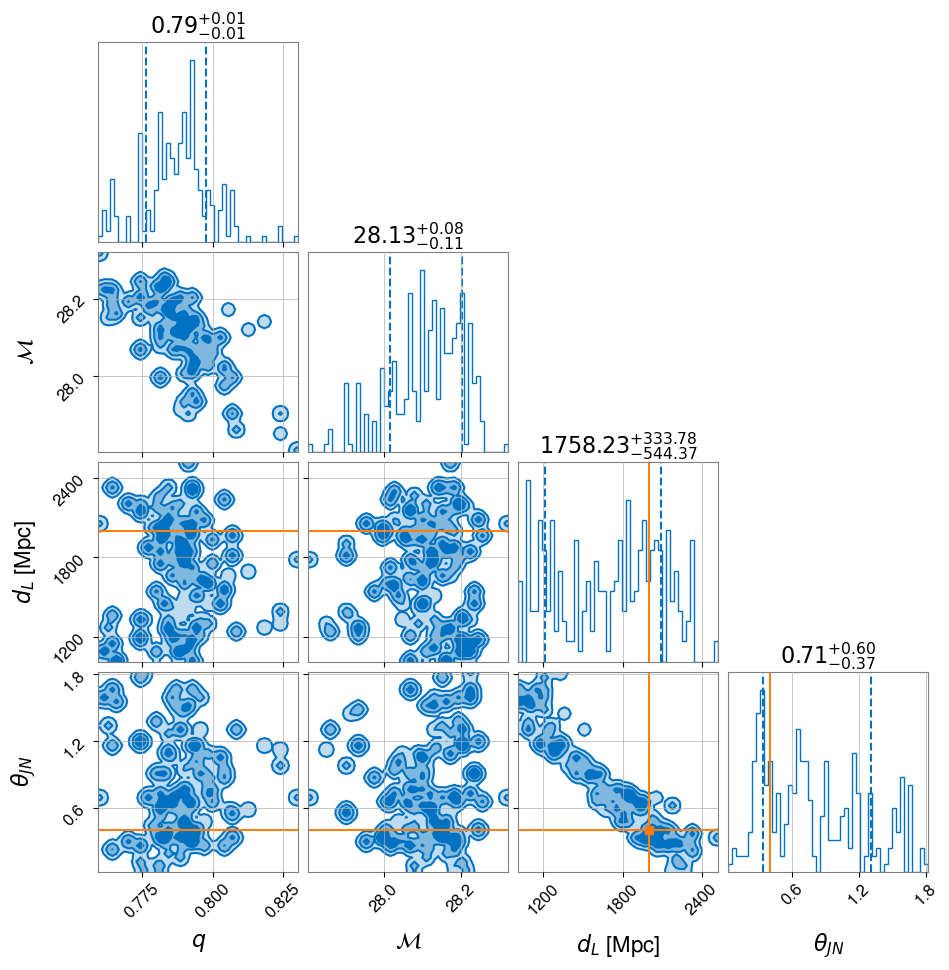

In [19]:
result.plot_corner()

In [44]:
bilby.gw.source.lal_binary_black_hole??